In [148]:
using LinearAlgebra
using CSV
using DataFrames
using Plots
using Statistics
using Polynomials

In [149]:
#zadanie 1

function check(x_proper, x_compare)
    flag = true
    for i in 1:length(x_proper)
        if round(x_proper[i], digits=4) != round(x_compare[i], digits=4)
            flag = false
        end
    end
    return flag
end

n = 1000
A = rand(n,n)
X = rand(n)
b = A * X

1000-element Vector{Float64}:
 245.4582412776419
 240.90215721945341
 245.95479210340133
 252.38493129418438
 255.95432816220523
 242.67706824824756
 250.711022408032
 248.54469239006258
 245.6986944436585
 244.95250984684702
 251.15377734458104
 249.84764204932537
 245.02041945399188
   ⋮
 248.9211367301072
 246.8277964693953
 245.94708474658646
 249.76211335677272
 238.0817391467436
 242.36070294255336
 244.5066444200603
 250.45031412721082
 248.68431629645642
 237.73685135328807
 250.48883460275522
 248.1436663135291

In [150]:
x = inv(A) * b
print("correct: ")
println(check(X, x))
print("difference: ")
println(sqrt(sum([X[i] - x[i] for i in 1:length(X)] .^ 2)))
print("time: ")
println(@elapsed inv(A) * b)

x = A \ b
print("correct: ")
println(check(X, x))
print("difference: ")
println(sqrt(sum([X[i] - x[i] for i in 1:length(X)] .^ 2)))
print("time: ")
println(@elapsed A \ b)

x = factorize(A) \ b
print("correct: ")
println(check(X, x))
print("difference: ")
println(sqrt(sum([X[i] - x[i] for i in 1:length(X)] .^ 2)))
print("time: ")
println(@elapsed factorize(A) \ b)

correct: true
difference: 6.477664585850194e-11
time: 0.0738711
correct: true
difference: 4.192261213935968e-11
time: 0.0200212
correct: true
difference: 4.192261213935968e-11
time: 0.0169156


In [151]:
#zadanie 2
df = CSV.read("../lab2/ex1_results.csv", delim = ",", DataFrame)
println(first(df,10))

10×3 DataFrame
 Row │ size   dot      multi     
     │ Int64  Float64  Float64   
─────┼───────────────────────────
   1 │  1000  1.76e-5  0.0031103
   2 │  1000  9.0e-6   0.0039259
   3 │  1000  8.7e-6   0.0046656
   4 │  1000  8.0e-6   0.173916
   5 │  1000  8.4e-6   0.0056267
   6 │  1000  8.9e-6   0.0052526
   7 │  1000  1.41e-5  0.0053132
   8 │  1000  1.01e-5  0.0045661
   9 │  1000  9.1e-6   0.0060508
  10 │  1000  2.43e-5  0.0148896


In [152]:
df = groupby(df, :size)
df = combine(df, "multi" => mean)
println(df)

10×2 DataFrame
 Row │ size   multi_mean 
     │ Int64  Float64    
─────┼───────────────────
   1 │  1000   0.0227317
   2 │  2000   0.0245362
   3 │  3000   0.0365882
   4 │  4000   0.0611809
   5 │  5000   0.0922669
   6 │  6000   0.141582
   7 │  7000   0.18047
   8 │  8000   0.233868
   9 │  9000   0.307745
  10 │ 10000   0.380242


0.0267003 - 1.01509e-5*x + 4.82374e-9*x^2 - 2.79775e-14*x^3


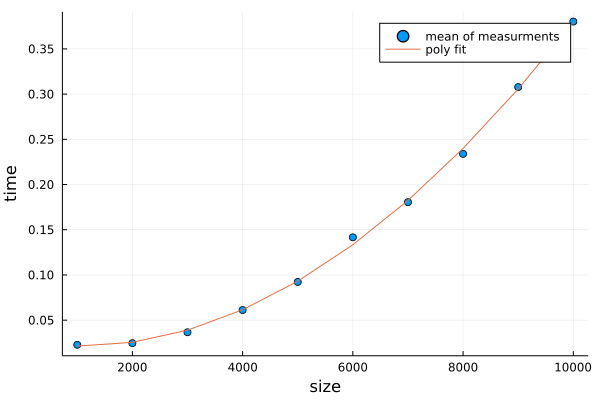

In [153]:
s = scatter(df.size, df.multi_mean, xlabel = "size", ylabel = "time", label = "mean of measurments")
poly = fit(df.size, df.multi_mean, 3)
println(poly)
plot!(df.size, [poly(x) for x in df.size], xlabel = "size", ylabel = "time", label = "poly fit")


In [154]:
x = transpose(df.size)
y = transpose(df.multi_mean)

A = zeros(length(x), 4)

10×4 Matrix{Float64}:
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0

In [155]:
A[:,1] = x .^ 3
A[:,2] = x .^ 2
A[:,3] = x .^ 1
A[:,4] = ones(length(x))
A

10×4 Matrix{Float64}:
 1.0e9    1.0e6   1000.0  1.0
 8.0e9    4.0e6   2000.0  1.0
 2.7e10   9.0e6   3000.0  1.0
 6.4e10   1.6e7   4000.0  1.0
 1.25e11  2.5e7   5000.0  1.0
 2.16e11  3.6e7   6000.0  1.0
 3.43e11  4.9e7   7000.0  1.0
 5.12e11  6.4e7   8000.0  1.0
 7.29e11  8.1e7   9000.0  1.0
 1.0e12   1.0e8  10000.0  1.0

In [173]:
AF = factorize(A)

QRPivoted{Float64, Matrix{Float64}}
Q factor:
10×10 LinearAlgebra.QRPackedQ{Float64, Matrix{Float64}}:
 -0.000710955  -0.0339428  -0.378124   …  -0.0960535  -0.207478   -0.282764
 -0.00568764   -0.118713   -0.518293      -0.0634765   0.220747    0.678134
 -0.0191958    -0.228722   -0.48057        0.497687    0.316026   -0.144889
 -0.0455012    -0.338383   -0.325016      -0.168339   -0.252272   -0.533898
 -0.0888694    -0.422107   -0.111694      -0.128003   -0.0471947   0.0717579
 -0.153566     -0.454308    0.0993344  …  -0.218805   -0.0870957   0.158386
 -0.243858     -0.409397    0.248007      -0.273819   -0.128876    0.1746
 -0.364009     -0.261787    0.274262       0.723252   -0.183053    0.0511814
 -0.518287      0.0141099   0.118037      -0.211292    0.739858   -0.281087
 -0.710955      0.443882   -0.280731      -0.0611514  -0.370663    0.108578
R factor:
4×4 Matrix{Float64}:
 -1.40656e12  -1.56997e8  -18010.6   -2.15064
  0.0         -2.61729e7   -7541.72  -1.80937
  0.0         

In [159]:
res = AF.R \ ((Transpose(AF.Q)*df.multi_mean)[1:4])
println(check(res, A \ df.multi_mean))
println(reverse(res))
println(poly)

true
[0.026700284999999994, -1.0150938288655776e-5, 4.823741013986011e-9, -2.7977515540015434e-14]
0.0267003 - 1.01509e-5*x + 4.82374e-9*x^2 - 2.79775e-14*x^3


In [198]:
#zadanie 3
#source: http://pi.math.cornell.edu/~web6140/TopTenAlgorithms/QRalgorithm.html

function eigenvalues(A, n)
    for k in 1:n
        AF = qr(A)
        A = Transpose(AF.Q)*A*AF.Q
    end
    return A
end

eigenvalues(rand(5,5), 333)

5×5 Matrix{Float64}:
  2.14827       -0.038274      0.0347981      0.0335157      1.06196
  4.93414e-216  -0.550027      0.0257339     -0.322879       0.332199
 -4.18304e-216  -0.185539     -0.414536       0.0144229      0.022984
 -5.25033e-270   2.15996e-54   2.88818e-55    0.332641      -0.018246
 -5.0e-324      -1.7875e-203  -1.53652e-203   2.00738e-150   0.119078